In [41]:
## Import data

data <- read.csv('NFL football palyers dataset.csv')
head(data)

,Date,Name,Session,GPS.Load,Total.Distance,Low.Intensity.Distance,Moderate.Intensity.Distance,High.Intensity.Distance,Sprint.Distance,Total.Acceleration,Med..Intensity.Accel.Count,High.Int..Accel.Count,Max.Int..Accel.Count,Total.Deceleration,Med..Intensity.Decel.Count,High.Intensity.Decel.Counts,Max.Intensity.Decel.Counts,Top.Sprint.Speed
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-07-14,Lance Boykin,Tempo,62,1348,215.68,337.00,471.80,323.52,15,2.40,4.5,8.10,12,7.44,4.308,0.252,15.46
2,2023-07-07,Joey Blount,Tempo,196,1346,215.36,336.50,471.10,323.04,18,2.88,5.4,9.72,17,10.54,6.103,0.357,14.81
3,2023-07-14,Joey Blount,Tempo,219,1343,214.88,335.75,470.05,322.32,13,2.08,3.9,7.02,16,9.92,5.744,0.336,17.09
4,2023-08-04,Joey Blount,Tempo,221,1332,213.12,333.00,466.20,319.68,9,1.44,2.7,4.86,16,9.92,5.744,0.336,21.07
5,2023-08-11,MJ Anderson,Tempo,198,1324,211.84,331.00,463.40,317.76,10,1.60,3.0,5.40,19,11.78,6.821,0.399,14.02
6,2023-07-07,Jamal Adams,Tempo,107,1317,210.72,329.25,460.95,316.08,13,2.08,3.9,7.02,15,9.30,5.385,0.315,16.23


In [42]:
## Inspect structure and summary statistics of the data

str(data)
summary(data)

'data.frame':	184 obs. of  18 variables:
 $ Date                       : chr  "2023-07-14" "2023-07-07" "2023-07-14" "2023-08-04" ...
 $ Name                       : chr  "Lance Boykin" "Joey Blount" "Joey Blount" "Joey Blount" ...
 $ Session                    : chr  "Tempo" "Tempo" "Tempo" "Tempo" ...
 $ GPS.Load                   : int  62 196 219 221 198 107 140 184 56 182 ...
 $ Total.Distance             : int  1348 1346 1343 1332 1324 1317 1299 1291 1291 1273 ...
 $ Low.Intensity.Distance     : num  216 215 215 213 212 ...
 $ Moderate.Intensity.Distance: num  337 336 336 333 331 ...
 $ High.Intensity.Distance    : num  472 471 470 466 463 ...
 $ Sprint.Distance            : num  324 323 322 320 318 ...
 $ Total.Acceleration         : int  15 18 13 9 10 13 16 17 17 8 ...
 $ Med..Intensity.Accel.Count : num  2.4 2.88 2.08 1.44 1.6 2.08 2.56 2.72 2.72 1.28 ...
 $ High.Int..Accel.Count      : num  4.5 5.4 3.9 2.7 3 3.9 4.8 5.1 5.1 2.4 ...
 $ Max.Int..Accel.Count       : num  8.1 9.7

     Date               Name             Session             GPS.Load     
 Length:184         Length:184         Length:184         Min.   : 13.00  
 Class :character   Class :character   Class :character   1st Qu.: 34.75  
 Mode  :character   Mode  :character   Mode  :character   Median : 59.50  
                                                          Mean   : 74.15  
                                                          3rd Qu.: 99.50  
                                                          Max.   :230.00  
 Total.Distance Low.Intensity.Distance Moderate.Intensity.Distance
 Min.   : 901   Min.   :145.3          Min.   :227.0              
 1st Qu.:1004   1st Qu.:215.2          1st Qu.:281.9              
 Median :1130   Median :285.4          Median :334.3              
 Mean   :1124   Mean   :272.2          Mean   :363.5              
 3rd Qu.:1246   3rd Qu.:321.1          3rd Qu.:439.6              
 Max.   :1348   Max.   :397.2          Max.   :565.3              
 High.

In [22]:
## Which players had the highest top 6 sprint speeds overall? This could identify the fastest players.
data %>% 
  select(c(Name, Top.Sprint.Speed))  %>% 
  arrange(by_group = desc(Top.Sprint.Speed))  %>% 
  head() 

,Name,Top.Sprint.Speed
,<chr>,<dbl>
1,Lance Boykin,23.93
2,MJ Anderson,23.82
3,Jake Bobo,23.78
4,Nick Bellore,23.57
5,Holton Ahlers,22.88
6,Lance Boykin,22.85


In [24]:
## Which players had the highest top 6 sprint speeds on average? This could identify the fastest players.
data  %>% 
  group_by(Name)  %>% 
  summarize(Top.Speeds = mean(Top.Sprint.Speed))  %>% 
  arrange(desc(Top.Speeds))  %>% 
  head()

Name,Top.Speeds
<chr>,<dbl>
Lance Boykin,18.41783
MJ Anderson,17.87696
Holton Ahlers,17.74652
Jamal Adams,17.47739
Nick Bellore,17.37783
Joey Blount,17.06478


In [32]:
## Which players covered the most total distance and sprint distance during sessions? This could identify players with the most endurance and speed.
data  %>% 
  group_by(Name) %>% 
  summarize(
      total.distance.covered = sum(Total.Distance),
      sprint.distance.covered = sum(Sprint.Distance))  %>% 
  arrange(by_group = desc(total.distance.covered),desc(sprint.distance.covered))

Name,total.distance.covered,sprint.distance.covered
<chr>,<int>,<dbl>
Joey Blount,27585,4208.06
Nick Bellore,26213,3982.60
Jake Bobo,26093,4029.40
Myles Adams,25831,3880.77
Jamal Adams,25463,3934.91
Holton Ahlers,25340,3919.28
MJ Anderson,25270,3799.60
Lance Boykin,24931,3855.16


In [39]:
## Which types of sessions (tempo, change of direction, etc.) tended to have the highest sprint speeds and distances?
## This could identify optimal training methods.
data  %>% 
  group_by(Session)  %>%
  summarize(Sum.of.max.speeds = sum(Top.Sprint.Speed))  %>% 
  arrange(desc(Sum.of.max.speeds)) 

data  %>% 
  group_by(Session)  %>%
  summarize(Sum.of.sprint.distances = sum(Sprint.Distance))  %>% 
  arrange(desc(Sum.of.sprint.distances))


Session,Sum.of.max.speeds
<chr>,<dbl>
Tempo,844.99
Acceleration,812.12
Max Velocity,787.35
Change of Direction,773.67


Session,Sum.of.sprint.distances
<chr>,<dbl>
Tempo,13002.72
Max Velocity,8830.80
Acceleration,6018.87
Change of Direction,3757.39


In [45]:
data$Top_Sprint_Speed

NULL

[1] -0.1029534

[1] 0.08958157

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


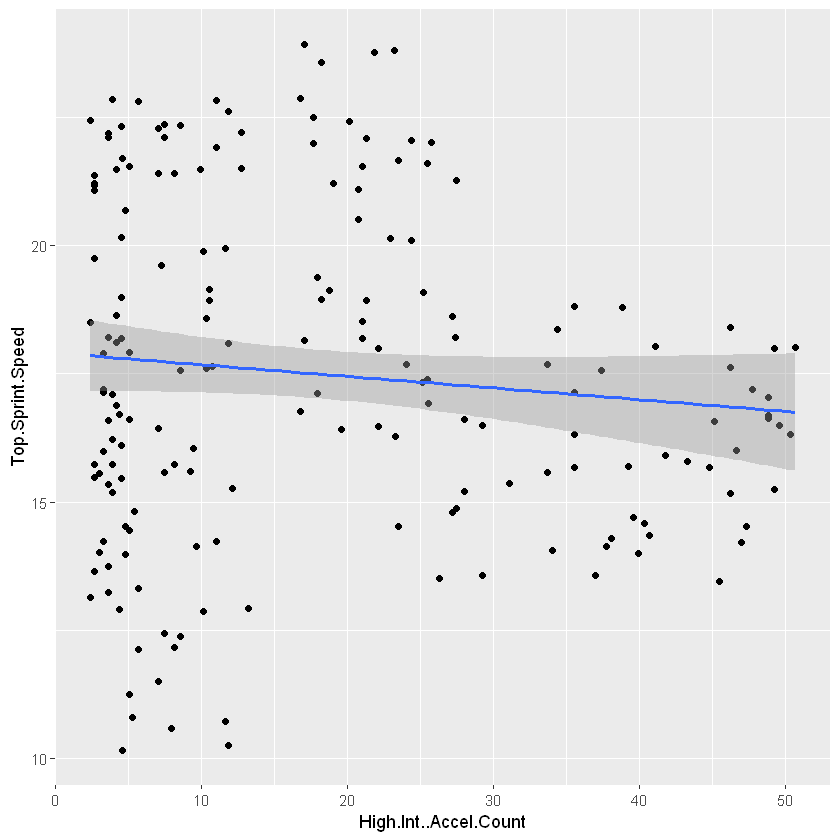

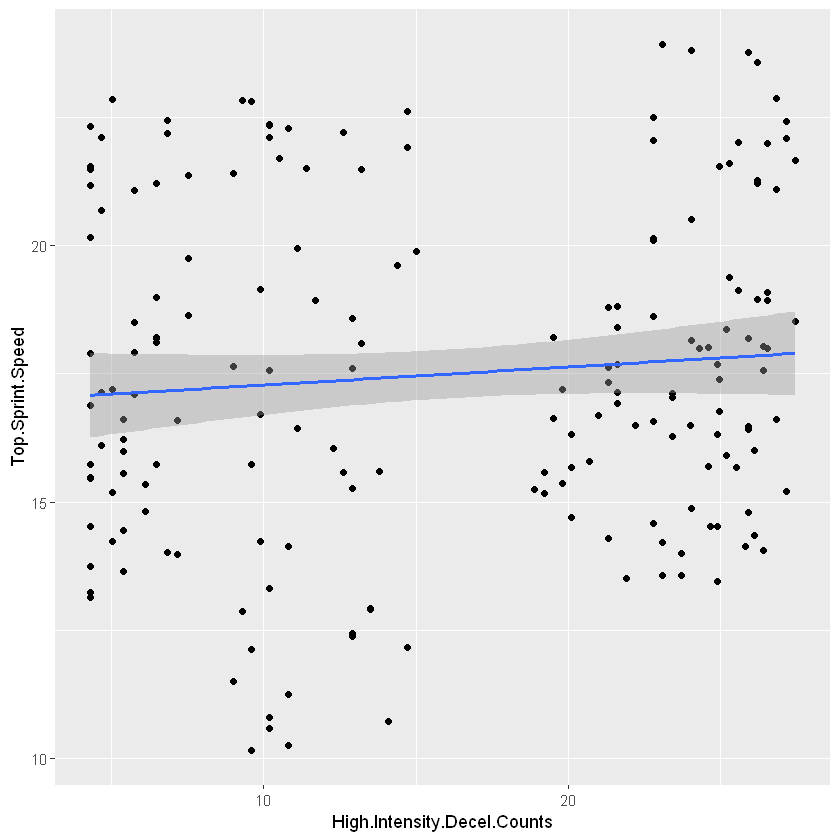

In [50]:
## How did acceleration and deceleration metrics correlate to sprint speed?
## This could show how starts/stops impact overall speed.
cor(data$High.Int..Accel.Count, data$Top.Sprint.Speed)
cor(data$High.Intensity.Decel.Counts, data$Top.Sprint.Speed) 

library(ggplot2)

ggplot(data, aes(High.Int..Accel.Count, Top.Sprint.Speed)) + 
  geom_point() +
  geom_smooth(method = "lm")

ggplot(data, aes(High.Intensity.Decel.Counts, Top.Sprint.Speed)) +
  geom_point() +
  geom_smooth(method = "lm")

In [42]:
data$High.Int..Accel.Count
data$High.Intensity.Decel.Counts

NULL

In [56]:
## Did any players show major increases or decreases in speed, distance, or acceleration over time? 
## This could identify improving players.

players_trends <- data %>% 
  arrange(Date)  %>% 
  group_by(Name, Date) %>%
  summarise(
    top_speed = mean(Top.Sprint.Speed),
    total_dist = sum(Total.Distance),
    accel = sum(High.Int..Accel.Count)
  )
players_trends  %>% 
  group_by(Name)  %>% 
  summarise(
    speed_diff = last(top_speed) - first(top_speed),
    dist_diff = last(total_dist) - first(total_dist),
    accel_diff = last(accel) - first(accel)
  )

`summarise()` has grouped output by 'Name'. You can override using the
`.groups` argument.


Name,speed_diff,dist_diff,accel_diff
<chr>,<dbl>,<int>,<dbl>
Holton Ahlers,-2.37,14,-5.64
Jake Bobo,1.22,160,-0.92
Jamal Adams,2.95,-241,-1.68
Joey Blount,6.88,-218,-8.58
Lance Boykin,-1.16,237,-5.88
MJ Anderson,-3.62,418,-7.78
Myles Adams,2.11,-231,-2.42
Nick Bellore,-3.61,-276,-5.08


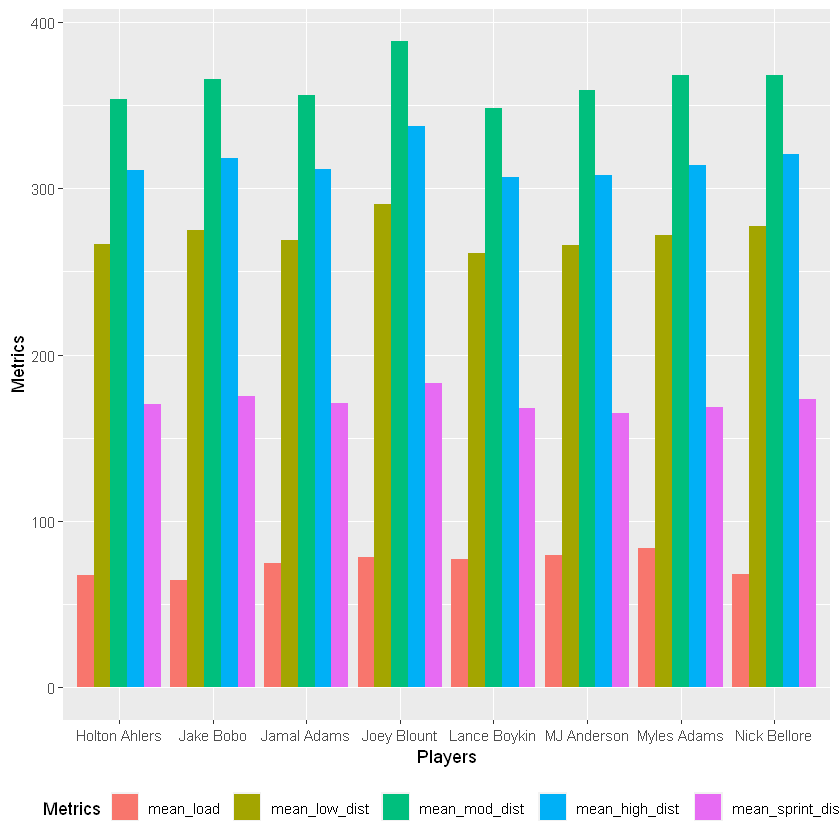

In [80]:
##  How did load and intensity zone distances compare between players?
## This could identify durability and conditioning differences.

player_summary <- data %>%
  group_by(Name) %>%
  summarize(
    mean_load = mean(GPS.Load),
    mean_low_dist = mean(Low.Intensity.Distance),
    mean_mod_dist = mean(Moderate.Intensity.Distance), 
    mean_high_dist = mean(High.Intensity.Distance),
    mean_sprint_dist = mean(Sprint.Distance)
  )
library(reshape2)
data_melt <- melt(player_summary, id.vars = "Name", variable.name = "metric")
ggplot(data_melt, aes(x = Name, y =  value, fill = metric)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  labs(x = 'Players', y = 'Metrics', fill = 'Metrics') +
  theme(legend.position = 'bottom')
  

In [81]:
summary(data$Low.Intensity.Distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  145.3   215.2   285.4   272.2   321.1   397.2 

In [82]:
## Were there relationships between intensity metrics (high speed distance, accelerations etc.) and injury risk?
## This could help optimize training load
# We assumed having a low intensity distance less than 200 meters indicator of injury

data <- data %>%
  mutate(injured = ifelse(Low.Intensity.Distance < 200, 1, 0))
library(tidyverse)

accel_model <- glm(injured ~ High.Int..Accel.Count, data = data, 
                   family = "binomial")
summary(accel_model)

high_speed_model <- glm(injured ~ High.Intensity.Distance, data = data,
                        family = "binomial") 
summary(high_speed_model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = injured ~ High.Int..Accel.Count, family = "binomial", 
    data = data)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)             6.1160     1.4761   4.143 3.42e-05 ***
High.Int..Accel.Count  -1.3451     0.3341  -4.026 5.67e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.701  on 183  degrees of freedom
Residual deviance:  62.185  on 182  degrees of freedom
AIC: 66.185

Number of Fisher Scoring iterations: 10



Call:
glm(formula = injured ~ High.Intensity.Distance, family = "binomial", 
    data = data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -7.518956   1.233366  -6.096 1.09e-09 ***
High.Intensity.Distance  0.018161   0.003424   5.304 1.13e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 184.7  on 183  degrees of freedom
Residual deviance: 147.5  on 182  degrees of freedom
AIC: 151.5

Number of Fisher Scoring iterations: 5


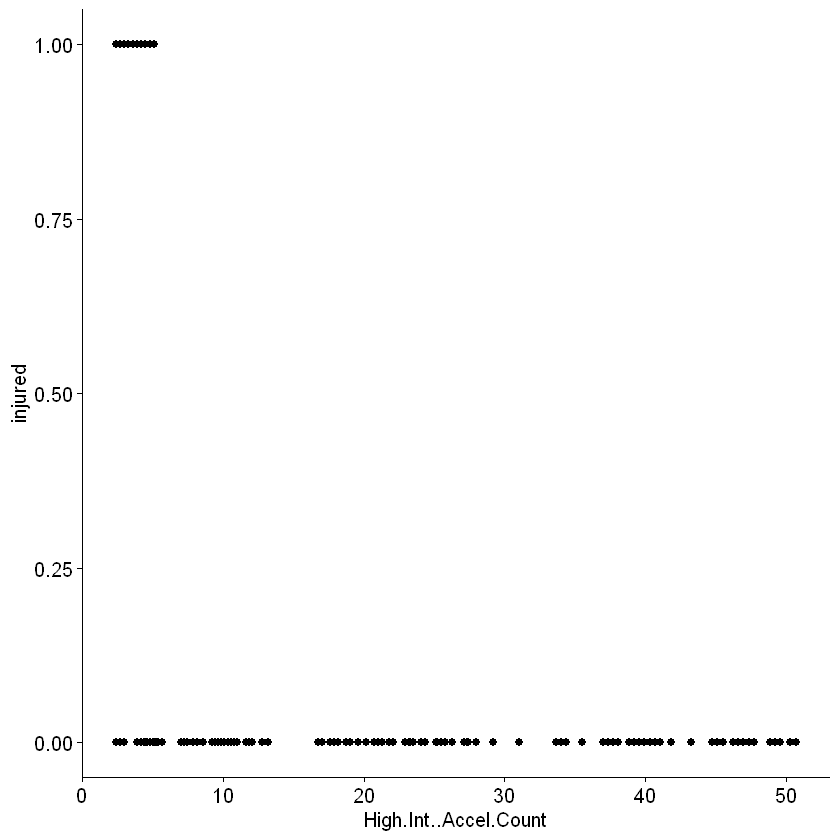

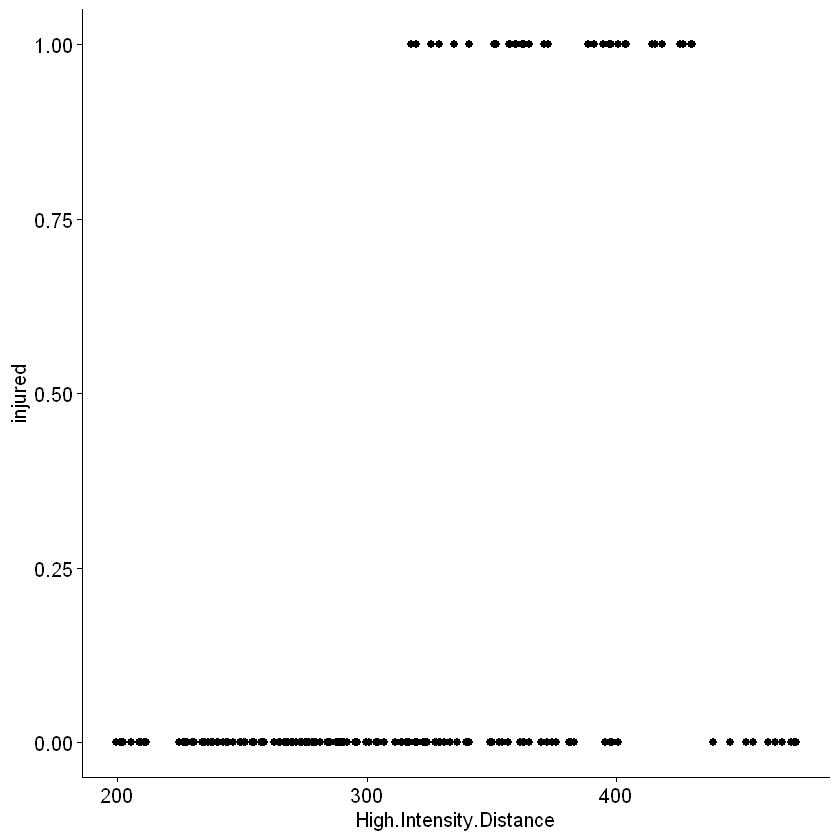

In [85]:
# Drawing the relationship
library(ggpubr) 

ggscatter(data, x = "High.Int..Accel.Count", y = "injured")
ggscatter(data, x = "High.Intensity.Distance", y = "injured")

             Df Sum Sq Mean Sq F value Pr(>F)
Season        2     15   7.493   0.698  0.499
Residuals   181   1943  10.735               

             Df Sum Sq Mean Sq F value Pr(>F)
Season        2  12750    6375    1.37  0.257
Residuals   181 842217    4653               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Top.Sprint.Speed ~ Season, data = data)

$Season
                 diff       lwr       upr     p adj
Late-Early -0.2535714 -1.716821 1.2096783 0.9117578
Mid-Early  -0.6752778 -2.054843 0.7042873 0.4806274
Mid-Late   -0.4217063 -1.801271 0.9578587 0.7505708


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = High.Intensity.Distance ~ Season, data = data)

$Season
                 diff       lwr       upr     p adj
Late-Early   4.489286 -25.97465 34.953226 0.9353638
Mid-Early  -14.429821 -43.15150 14.291857 0.4622916
Mid-Late   -18.919107 -47.64079  9.802571 0.2672330


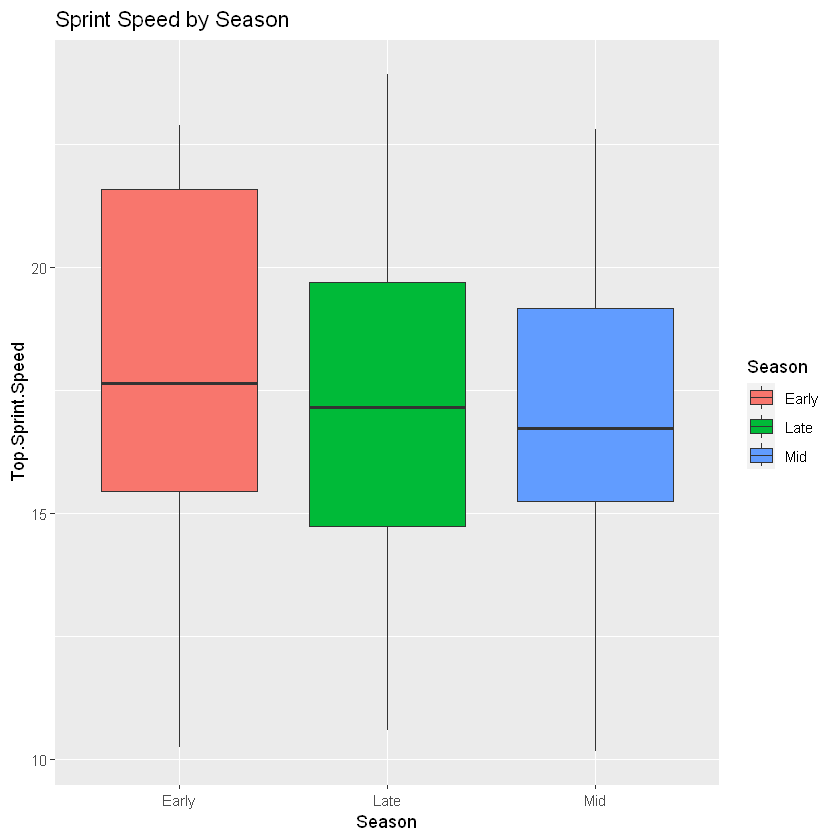

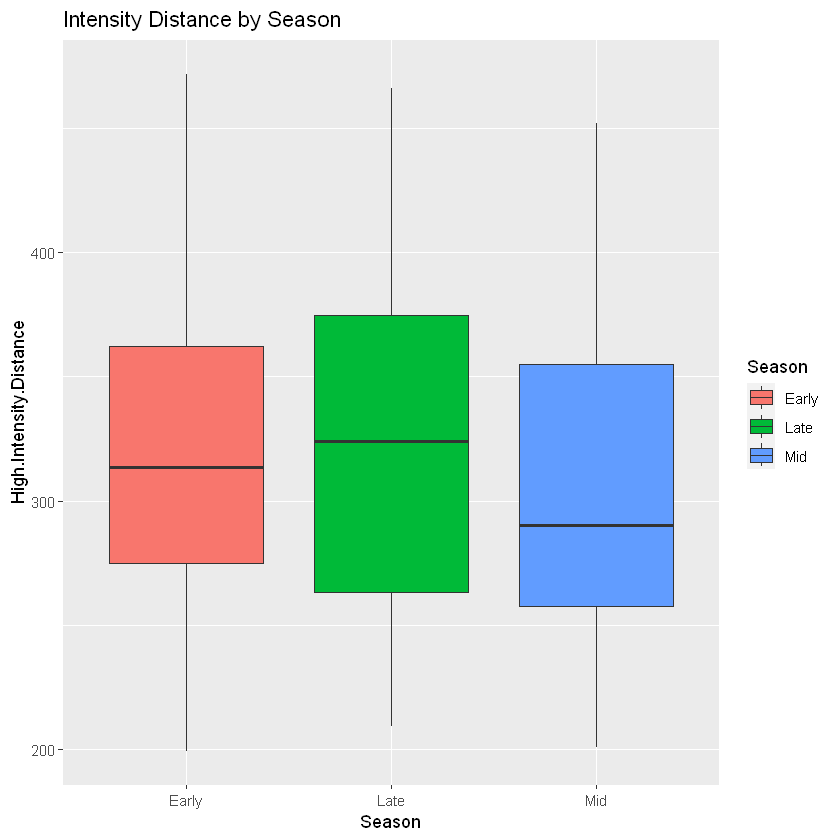

In [19]:
## Were there differences in performance between early, mid and late season? 
## Comparing metrics for July, August, and September sessions.

# Create season factor
data$Date <- as.Date(data$Date, "%Y-%m-%d")
data$Season <- ifelse(data$Date < "2023-07-15", "Early", 
                    ifelse(data$Date < "2023-08-01", "Mid", "Late"))

# ANOVA to compare metrics by season 
tss_aov <- aov(Top.Sprint.Speed ~ Season, data = data)
summary(tss_aov)

hid_aov <- aov(High.Intensity.Distance ~ Season, data = data)
summary(hid_aov)

# Tukey's HSD test for pairwise comparisons
TukeyHSD(tss_aov)
TukeyHSD(hid_aov)

# Boxplots to visualize
ggplot(data, aes(x = Season, y = Top.Sprint.Speed, fill = Season)) +
  geom_boxplot() + 
  labs(title = "Sprint Speed by Season") 

ggplot(data, aes(x = Season, y = High.Intensity.Distance, fill = Season)) +
  geom_boxplot() +
  labs(title = "Intensity Distance by Season") 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


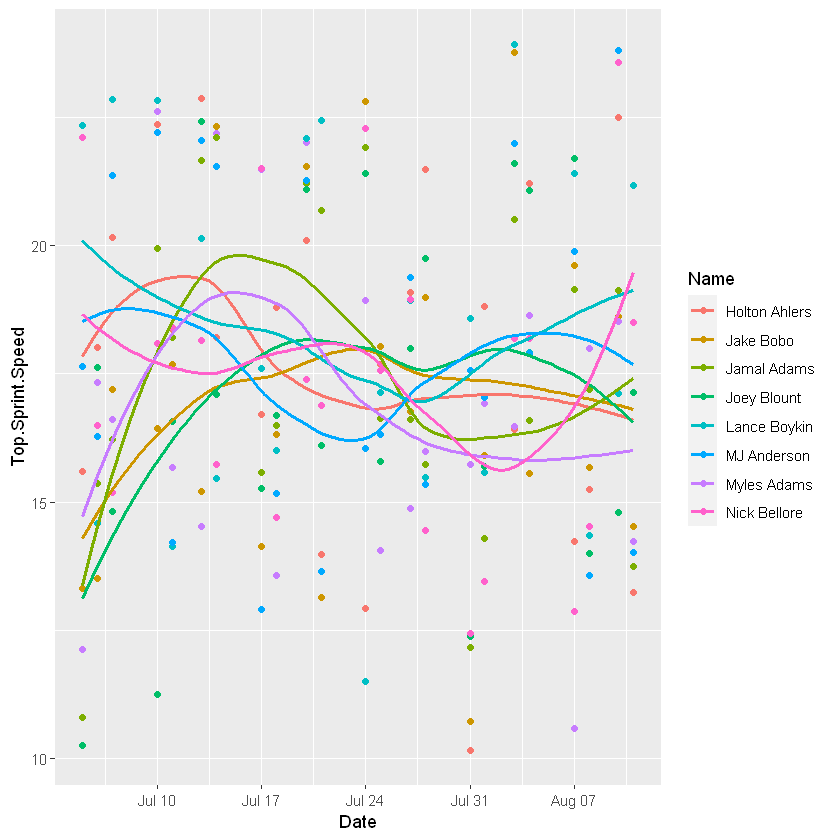

In [40]:
# Plot top sprint speed for each player with the fitted line over time
ggplot(data, aes(x = Date, y = Top.Sprint.Speed, color = Name)) +
  geom_point() +
  geom_smooth(se = F) 